## マッチング  
$G = (V, E)$をグラフとし、$M \subseteq{E}$とする。$M$のどの2辺も同じ頂点に接続しないとき$M$をマッチング(matching)という  
並木、Pythonによる数理最適化入門、朝倉書店、P142  

例  
$M_1 = \{(1,2),(3,5),(4,6)\}$はマッチング  
$M_2 = \{(1,2),(2,4),(5,6)\}$はマッチングでない

In [1]:
#並木、Pythonによる数理最適化入門、P143 最大マッチング、重み最大マッチングの例
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

{0: array([-0.05526666,  0.76753362]), 1: array([0.41169362, 0.26421985]), 2: array([ 1.        , -0.07783192]), 3: array([-0.2935257 ,  0.46077229]), 4: array([ 0.04694391, -0.00384084]), 5: array([ 0.22864712, -0.4681749 ]), 6: array([-0.83427271,  0.20185684]), 7: array([-0.42741514, -0.3447906 ]), 8: array([-0.07680445, -0.79974434])}


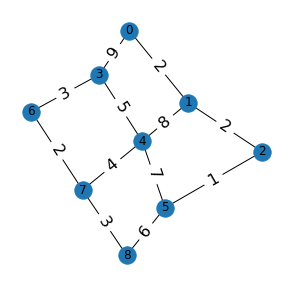

In [2]:
#Pythonで学ぶネットワーク分析 ColaboratoryとNetworkXを使った実践入門 P105の書き方を参照
G = nx.Graph()
G.add_nodes_from(range(0,9))
G.add_weighted_edges_from([(0,1,2),(1,2,2),(0,3,9),(1,4,8),(2,5,1),(3,4,5),(4,5,7),(3,6,3),(4,7,4),(5,8,6),(6,7,2),(7,8,3)])

plt.figure(figsize=(5,5))
pos = nx.spring_layout(G)
print(pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u,v): d['weight'] for u,v,d in G.edges(data=True)})
nx.draw_networkx_labels(G,pos)
plt.axis('off')
plt.show()

In [3]:
M = nx.maximal_matching(G)
mw = nx.max_weight_matching(G)
print(M)
print(mw)

{(0, 1), (2, 5), (3, 4), (6, 7)}
{(1, 4), (0, 3), (8, 5), (6, 7)}


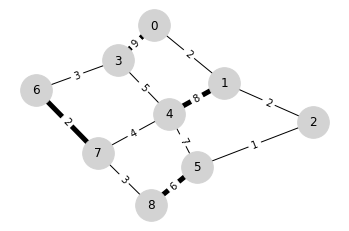

In [4]:
nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=1000, width=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=mw, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={(u,v): d['weight'] for u,v,d in G.edges(data=True)})
plt.axis('off')
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
df = pd.read_excel('/content/drive/MyDrive/研究/AHP/matching_sample.xlsx')
df

,studentID,companyID,ahpValue
0,1,6,0.2
1,1,9,0.1
2,1,10,0.7
3,2,6,0.3
4,2,7,0.3
5,2,8,0.4
6,3,6,0.4
7,3,7,0.4
8,3,10,0.2
9,4,7,0.1


In [8]:
#dfをtupleに変換
subset = df[['studentID', 'companyID', 'ahpValue']]
tuples = [tuple(x) for x in subset.values]
tuples

[(1.0, 6.0, 0.2),
 (1.0, 9.0, 0.1),
 (1.0, 10.0, 0.7),
 (2.0, 6.0, 0.3),
 (2.0, 7.0, 0.3),
 (2.0, 8.0, 0.4),
 (3.0, 6.0, 0.4),
 (3.0, 7.0, 0.4),
 (3.0, 10.0, 0.2),
 (4.0, 7.0, 0.1),
 (4.0, 9.0, 0.6),
 (4.0, 10.0, 0.3),
 (5.0, 8.0, 0.5),
 (5.0, 9.0, 0.2),
 (5.0, 10.0, 0.3)]

In [9]:
G = nx.Graph()
G.add_nodes_from(range(1,11))
G.add_weighted_edges_from(tuples)
pos = nx.spring_layout(G)

In [10]:
M = nx.maximal_matching(G)
mw = nx.max_weight_matching(G)
print(M)
print(mw)

{(2, 7.0), (4, 9.0), (3, 10.0), (1, 6.0), (5, 8.0)}
{(2, 6.0), (9.0, 4), (1.0, 10), (3, 7), (8.0, 5)}


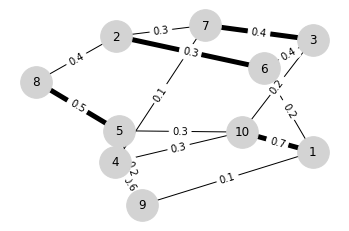

In [11]:
nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=1000, width=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=mw, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={(u,v): d['weight'] for u,v,d in G.edges(data=True)})
plt.axis('off')
plt.show()

In [16]:
#AHPデータで利用
df = pd.read_csv('/content/drive/MyDrive/研究/AHP/studentcompanies.csv', index_col=0)
df

,student_id,company_id,score,Unnamed: 4
id,,,,
1,1,825,0.087878,NaN
2,1,1857,0.088365,NaN
3,1,1875,0.085053,NaN
4,1,1955,0.087316,NaN
5,1,1968,0.088752,NaN
...,...,...,...,...
464,5,2518,0.087021,NaN
465,5,2628,0.088994,NaN
466,5,3093,0.085991,NaN


In [17]:
#dfをtupleに変換
subset = df[['student_id', 'company_id', 'score']]
tuples = [tuple(x) for x in subset.values]
tuples

[(1.0, 825.0, 0.087877686),
 (1.0, 1857.0, 0.08836543699999999),
 (1.0, 1875.0, 0.08505327800000001),
 (1.0, 1955.0, 0.087316036),
 (1.0, 1968.0, 0.08875159699999999),
 (1.0, 1985.0, 0.08895226199999999),
 (1.0, 1995.0, 0.08829926),
 (1.0, 2002.0, 0.087976951),
 (1.0, 2009.0, 0.08842682699999999),
 (1.0, 2011.0, 0.08898860800000001),
 (1.0, 2022.0, 0.088468195),
 (1.0, 2033.0, 0.086541666),
 (1.0, 2035.0, 0.088920264),
 (1.0, 2041.0, 0.089583994),
 (1.0, 2050.0, 0.087998787),
 (1.0, 2071.0, 0.088820824),
 (1.0, 2079.0, 0.088274658),
 (1.0, 2090.0, 0.08630006400000001),
 (1.0, 2091.0, 0.08837830099999999),
 (1.0, 2109.0, 0.089086397),
 (1.0, 2130.0, 0.08841754800000001),
 (1.0, 2131.0, 0.087223723),
 (1.0, 2145.0, 0.090024809),
 (1.0, 2157.0, 0.087388491),
 (1.0, 2206.0, 0.089475327),
 (1.0, 2208.0, 0.08510696699999999),
 (1.0, 2406.0, 0.084011864),
 (1.0, 2424.0, 0.08849093),
 (1.0, 2436.0, 0.08860522800000001),
 (1.0, 2440.0, 0.089230194),
 (1.0, 2448.0, 0.089204343),
 (1.0, 2460.0, 0

In [24]:
#ノード番号の算出
df_student = df['student_id'].unique()
df_company = df['company_id'].unique()
df_id = np.concatenate([df_student,df_company], axis=0)
df_id

array([   1,    5,  825, 1857, 1875, 1955, 1968, 1985, 1995, 2002, 2009,
       2011, 2022, 2033, 2035, 2041, 2050, 2071, 2079, 2090, 2091, 2109,
       2130, 2131, 2145, 2157, 2206, 2208, 2406, 2424, 2436, 2440, 2448,
       2460, 2462, 2469, 2472, 2476, 2480, 2496, 2504, 2513, 2533, 2554,
       2556, 2590, 2596, 2603, 2612, 2629, 2639, 2643, 2652, 2666, 2711,
       2721, 2736, 2740, 2747, 2749, 2754, 2755, 2757, 2762, 2776, 2779,
       2798, 2800, 2805, 2823, 2826, 2831, 2835, 2837, 2839, 2846, 2847,
       2850, 2852, 2856, 2869, 2876, 2877, 2880, 2890, 2893, 2894, 2899,
       2906, 2911, 2917, 2920, 2923, 2938, 2940, 2941, 2951, 2964, 2971,
       2980, 2986, 2993, 2994, 2995, 2996, 3003, 3009, 3011, 3024, 3033,
       3046, 3047, 3049, 3050, 3051, 3057, 3066, 3067, 3068, 3070, 3080,
       3084, 3085, 3090, 3101, 3104, 3107, 3126, 3128, 3132, 3143, 3149,
       3153, 3155, 3161, 3162, 3164, 3171, 3184, 3185, 3194, 3199, 3206,
       3208, 3218, 3222, 3229, 3237, 3246, 3249, 32

In [25]:
G = nx.Graph()
G.add_nodes_from(df_id)
G.add_weighted_edges_from(tuples)
pos = nx.spring_layout(G)

In [26]:
M = nx.maximal_matching(G)
mw = nx.max_weight_matching(G)
print(M)
print(mw)

{(5, 1857.0), (1, 825.0)}
{(1, 798.0), (5.0, 3349)}


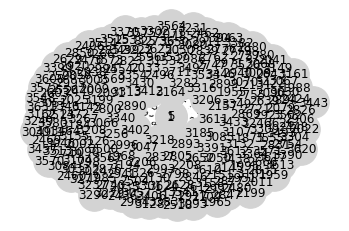

In [27]:
nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=1000, width=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=mw, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={(u,v): d['weight'] for u,v,d in G.edges(data=True)})
plt.axis('off')
plt.show()